# Libraries

In [1]:
import shutup
import pandas as pd
import numpy as np
import os as os
import matplotlib.pyplot as plt
import re
from IPython.display import display
import datetime as dt

# Load train data

- iterate through train data folder 
- feature engineer the **country** and **league** from parent folder name
- join the loaded csv files by rows
- removed quotation marks that would in some rows merge two columns into one

In [2]:
def replace_last(string, old, new):
    return new.join(string.rsplit(old, 1))

def delete_quotation_marks(path):
    with open(path, "r") as f:
        raw_file = f.readlines()
        count=0
        for i in range(len(raw_file)):
            match = re.search("\"(\+|-)?\d+\.?\d*,(\+|-)?\d+\.?\d*\"", raw_file[i])
            if match:
                count+=1
                raw_file[i] = raw_file[i].replace("\"","")
                raw_file[i] = replace_last(raw_file[i], ",","\n")
    with open(path, "w") as f:
        f.writelines(raw_file)

In [3]:
df = pd.DataFrame()
for root, directory, files in os.walk("data/train", topdown=False):
    if files:
        for file in files:
            tmp = pd.read_csv(f"{root}/{file}")
            # Remove empty rows and columns
            tmp = tmp.dropna(how='all', axis=0)
            tmp = tmp.dropna(how='all', axis=1)
            # Derive additional columns
            tmp["league"] = int(root.split("\\")[2])
            tmp["country"] = root.split("\\")[1]
            tmp["season"] = int(file[:2]) # no. of season - 00/01 - 0th season, 21/22 - 21st season
            df = pd.concat([df, tmp], axis = 0)
            
df.to_csv("combined.csv")
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,LBAHA,LBAH,LB,LB.1,LB.2,HT,AT,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,B1,20/05/01,Mechelen,Lierse,1.0,1.0,D,1.0,1.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B1,17/09/00,Germinal,Club Brugge,2.0,3.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B1,14/10/00,Beveren,Standard,0.0,3.0,A,0.0,2.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B1,06/09/00,Lokeren,Mechelen,3.0,2.0,H,0.0,2.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B1,27/08/00,Charleroi,Antwerp,1.0,0.0,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
delete_quotation_marks("combined.csv")

In [5]:
shutup.please()
df = pd.read_csv("combined.csv")
df.head()

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,LBAHA,LBAH,LB,LB.1,LB.2,HT,AT,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,0,B1,20/05/01,Mechelen,Lierse,1.0,1.0,D,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,B1,17/09/00,Germinal,Club Brugge,2.0,3.0,A,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,B1,14/10/00,Beveren,Standard,0.0,3.0,A,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,B1,06/09/00,Lokeren,Mechelen,3.0,2.0,H,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,B1,27/08/00,Charleroi,Antwerp,1.0,0.0,H,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df["BbAHh"].describe()

count    98818.000000
mean        -0.305852
std          1.284157
min       -275.000000
25%         -0.500000
50%         -0.250000
75%          0.000000
max         12.500000
Name: BbAHh, dtype: float64

# Data validation

In some cases, the data is wrong. This section correct the loaded data.

## Same name for different things

In some cases, columns are named differently. We will standardize to use column names that are in *'notes.txt'*


In [7]:
for root, directory, files in os.walk("data/train", topdown=False):
    if files:
        for file in files:
            tmp = pd.read_csv(f"{root}/{file}")
            if "HT" in tmp.columns:
                print(f"Cases for HT: {root}, {file}")
            if "AT" in tmp.columns:
                print(f"Cases for AT: {root}, {file}")

Cases for HT: data/train\greece\1, 0001.csv
Cases for AT: data/train\greece\1, 0001.csv
Cases for HT: data/train\greece\1, 0102.csv
Cases for AT: data/train\greece\1, 0102.csv
Cases for HT: data/train\greece\1, 0203.csv
Cases for AT: data/train\greece\1, 0203.csv
Cases for HT: data/train\greece\1, 0304.csv
Cases for AT: data/train\greece\1, 0304.csv
Cases for HT: data/train\greece\1, 0405.csv
Cases for AT: data/train\greece\1, 0405.csv


The only affected data are in Greece.

In [8]:
df["HomeTeam"] = df["HomeTeam"].mask(df["HT"].notnull(), df["HT"])
df["AwayTeam"] = df["AwayTeam"].mask(df["AT"].notnull(), df["AT"])
df = df.drop(columns = ["HT", "AT"])

In [9]:
df.drop(df[df["HomeTeam"] == df["AwayTeam"]].index, inplace=True) # remove cases where teams play themselves

In [10]:
df["Date"] = pd.to_datetime(df["Date"], format = 'mixed', dayfirst=True)

## Not imputable data

In some cases, missing data cause the data to be unusable and can't be computed. This applies to variables

- HomeTeam
- AwayTeam

In [11]:
crucial_cols = ['Date', 'HomeTeam', 'AwayTeam']
df = df.dropna(subset = crucial_cols)

In [12]:
df[["HFKC", "AFKC"]].describe()

,HFKC,AFKC
count,1305.000000,1305.000000
mean,16.627586,17.283525
std,4.386871,4.735901
min,2.000000,2.000000
25%,14.000000,14.000000
50%,16.000000,17.000000
75%,20.000000,20.000000
max,32.000000,34.000000


## Goal validation

Some goals are incorrect and they need to be fixed.



In [13]:
goal_cols = ["FTHG", "FTAG", "HTHG", "HTAG"]
df[goal_cols].describe()

,FTHG,FTAG,HTHG,HTAG
count,154495.000000,154473.000000,154445.000000,154454.000000
mean,2.217761,1.131447,0.655308,0.494315
std,21.887856,1.108842,0.809085,0.708314
min,0.000000,-1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000
max,998.000000,13.000000,7.000000,6.000000


There seems to be several issues:

- the max value for **FTHG** is absurd
- the min value for **FTAG** does not make sense
- some values are missing

In [14]:
df["FTHG"].value_counts().head(12)

FTHG
1.0      51639
2.0      37642
0.0      36011
3.0      18462
4.0       7202
5.0       2343
6.0        751
7.0        185
8.0         42
9.0         14
10.0         5
339.0        5
Name: count, dtype: int64

First, we will remove all rows where the Full Time Home Goals are greater than 10.

In [15]:
df = df[df["FTHG"] <= 10]

Next, all Full Time Away goals that are less than zero are inspected. Since we are not sure which values are good and bad, all of them are removed.

In [16]:
df = df[df["FTAG"] >= 0]

What's left are the missing values. We have no way of recomputing these as well and these rows are again excluded.

In [17]:
df = df[df[goal_cols].isna().sum(axis=1) == 0]

If we run the describe() function again, we can see that the counts are the same and min/max statistics make sense.

In [18]:
df[goal_cols].describe()

,FTHG,FTAG,HTHG,HTAG
count,153834.000000,153834.000000,153834.000000,153834.000000
mean,1.485536,1.133768,0.655369,0.494481
std,1.253200,1.107155,0.809073,0.708545
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000
max,10.000000,13.000000,7.000000,6.000000


## Result validation

Another thing that needs to be validated is the result classification, which are re-classified - this is the easiest data validation process.

In [19]:
half_conds = [df["HTHG"] > df["HTAG"], df["HTHG"] < df["HTAG"], df["HTHG"] == df["HTAG"]]
half_choic = ["H"                    , "A"                    , "D"]
df.loc[:, "HTR"] = np.select(half_conds, half_choic)
full_conds = [df["FTHG"] > df["FTAG"], df["FTHG"] < df["FTAG"], df["FTHG"] == df["FTAG"]]
full_choic = ["H"                    , "A"                    , "D"]
df.loc[:, "FTR"] = np.select(full_conds, full_choic)

## Validation of other statistics

First step is to look at simple descriptive statistics.

In [20]:
stat_cols = [
    'Attendance', 'HS', 'AS', 'HST', 'AST', 'HHW', 'AHW',
    'HC', 'AC', 'HF', 'AF', 'HFKC', 'AFKC', 'HO', 'AO', 'HY', 'AY', 'HR', 'AR', "HBP", "ABP"
]

df[stat_cols].describe()

,Attendance,HS,AS,HST,AST,HHW,AHW,HC,AC,HF,...,HFKC,AFKC,HO,AO,HY,AY,HR,AR,HBP,ABP
count,6641.000000,91641.000000,91683.000000,90736.000000,90761.000000,6472.000000,6484.000000,91235.000000,91286.000000,89606.000000,...,1298.000000,1298.000000,6485.000000,6466.000000,91834.000000,91831.000000,91854.000000,91799.000000,6652.000000,6639.000000
mean,12853.621894,12.675691,10.296674,5.231694,4.209760,0.351823,0.260950,5.722694,4.647372,12.849296,...,16.620955,17.298921,3.258288,3.250541,1.642714,1.960275,0.086964,0.119936,15.496843,20.928604
std,13873.200798,4.925237,4.384018,2.808410,2.456552,0.610765,0.543137,2.937960,2.624308,4.555750,...,4.394704,4.740125,2.368060,2.519042,1.292988,1.365244,0.299356,0.351835,14.991016,17.225443
min,123.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3530.000000,9.000000,7.000000,3.000000,2.000000,0.000000,0.000000,4.000000,3.000000,10.000000,...,14.000000,14.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,10.000000
50%,7014.000000,12.000000,10.000000,5.000000,4.000000,0.000000,0.000000,5.000000,4.000000,12.000000,...,16.000000,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,0.000000,10.000000,20.000000
75%,17608.000000,16.000000,13.000000,7.000000,6.000000,1.000000,0.000000,7.000000,6.000000,16.000000,...,20.000000,20.000000,5.000000,5.000000,2.000000,3.000000,0.000000,0.000000,20.000000,30.000000
max,69000.000000,46.000000,45.000000,27.000000,23.000000,4.000000,10.000000,26.000000,21.000000,145.000000,...,32.000000,34.000000,16.000000,18.000000,11.000000,10.000000,3.000000,9.000000,115.000000,150.000000


Then we take a look at boxplots for variables where at least one variable falls out of the interval

$$
(\text{q}_{0.25} - 3 * \text{IQR} ; \text{q}_{0.75} + 3 * \text{IQR})
$$

In [21]:
def outliers(x, multi = 3):
    q25 = x.quantile(0.25)
    q75 = x.quantile(0.75)
    iqr = q75 - q25
    outliers = x[(x < q25 - multi * iqr) | (x > q75 + multi * iqr)]
    return len(outliers)

stat_outliers = df[stat_cols].apply(lambda x: outliers(x))
stat_outliers = stat_outliers[stat_outliers != 0]
stat_outliers

Attendance      109
HS               14
AS               23
HST              18
AST               8
AHW            1435
HC              174
AC               72
HF               21
AF               25
HO                4
AO                2
HY              632
AY                2
HR             7542
AR            10247
HBP              13
ABP              24
dtype: int64

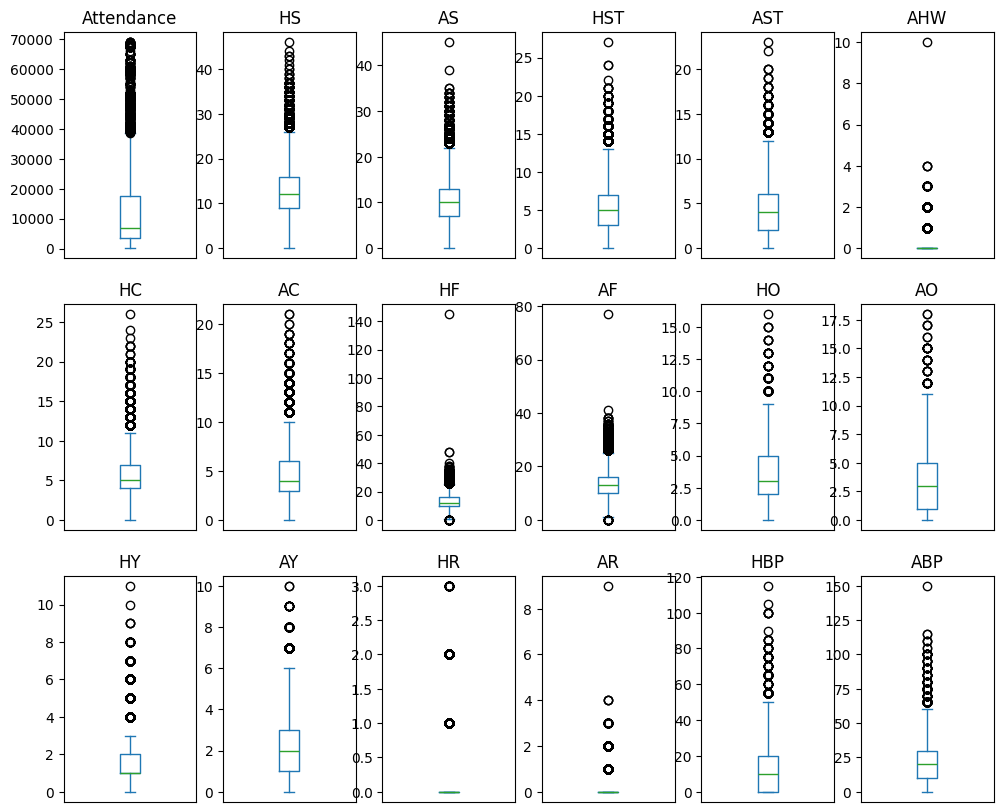

In [22]:
fig, axes = plt.subplots(nrows=3, ncols = 6, figsize = (12, 10))
axes = axes.ravel()

for i, col in enumerate(stat_outliers.index):
    # Data
    df[col].plot(kind='box', ax = axes[i])
    # Styling
    axes[i].set_title(col)
    axes[i].axes.get_xaxis().set_visible(False)

plt.show()


We can se that some outliers are not that extreme. For example variables *HO*, *AO* or *HY* have extreme values, but won't remove them. This is because even tho they can be considered as extreme, there seems to be a natural way how they occured and tehre are no huge jumps between them.

On the other hand, variables *AHW*, *HF*, *AF* and *AR* seem to have some variables that are far away from the other data. Note that we do not consider variables in *HR* as outliers because it looks like it's a discrete variable with mostly zeroes.

In [23]:
stat_jump = [
    "AS", "AHW", "HF", "AF", "AR", "ABP"
]
stats_cut = [
    38, 6, 100, 60, 6, 130
]

print("Number of extreme values:")
for i, col in enumerate(stat_jump):
    cutoff = stats_cut[i]
    x = df[col].to_numpy()
    extreme = x[x > cutoff]
    print(f"{col}: {extreme}, (count: {len(extreme)})")
    
plt.show()

Number of extreme values:
AS: [45. 39.], (count: 2)
AHW: [10.], (count: 1)
HF: [145.], (count: 1)
AF: [77.], (count: 1)
AR: [9.], (count: 1)
ABP: [150.], (count: 1)


Based on the analysis, we see that these extreme values occur at most twice. This is why we chose to remove them.

In [24]:
criteria = dict(zip(stat_jump, stats_cut))
for column, value in criteria.items():
    # .isna() is important because otherwise all na rows are dropped
    df = df[df[column].lt(value) | df[column].isna()]

Finally, we will double-check with boxplots.

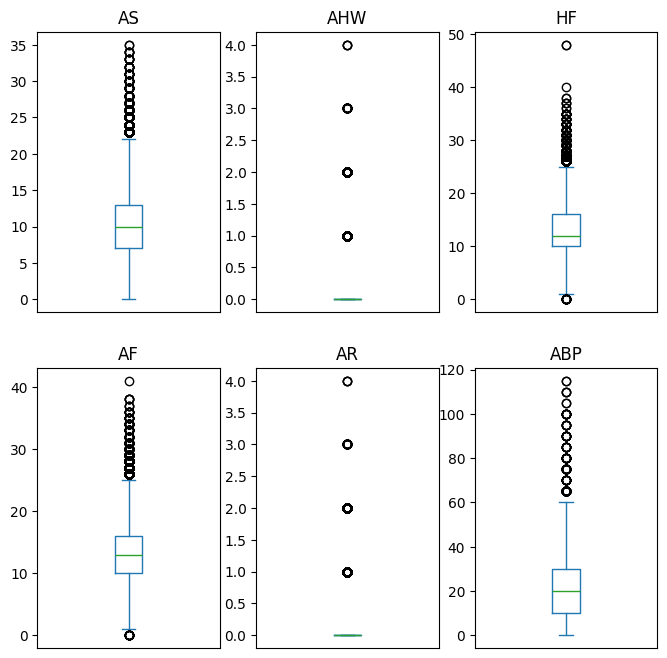

In [25]:
fig, axes = plt.subplots(nrows=2, ncols = 3, figsize = (8, 8))
axes = axes.ravel()

for i, col in enumerate(stat_jump):
    df[col].plot(kind='box', ax = axes[i])
    axes[i].set_title(col)
    axes[i].axes.get_xaxis().set_visible(False)

plt.show()

IT looks like variable *HF* contains another outlier, but this process should be done only once. Hence, no outliers are removed.

## Random unnamed data

File *'data/train/portugal/1/0304.csv'* contains random data in columns *'Unnamed: 33'* and *'Unnamed: 34'*.

In [26]:
unnamed_cols_df = df[['Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34']]
unnamed_cols_df[unnamed_cols_df.notnull().any(axis=1)]

,Unnamed: 32,Unnamed: 33,Unnamed: 34
108856,2.0,1.8,-1.75


Since we do not know what these columns represent, and it is only one non-NA row from the whole dataset, this column is removed.

In [27]:
df = df.drop(columns = unnamed_cols_df.columns)

## Wrong betting odds names

File *'data/train/germany/2/0405.csv'* contains columns **LB**, **LB.1** and **LB.2**, which are unique only to this file. After further investigation, they represent the betting odds data for Ladbrokers. After looking at the data more thoroughly, it can be guessed that all three columns represent odds for home win, away win, and draw.

In [28]:
tmp = pd.read_csv("data/train/germany/2/0405.csv")
# Remove empty rows and columns
tmp = tmp.dropna(how='all', axis=0)
tmp = tmp.dropna(how='all', axis=1)
tmp = tmp.loc[:, ~tmp.columns.str.startswith('Unnamed:')]
tmp = tmp[tmp[['LB', 'LB.1', 'LB.2']].notnull().any(axis=1)]
tmp.filter(regex='[HDAB12]$').iloc[:, -12:]

,LB,LB.1,LB.2,SBH,SBD,SBA,WHH,WHD,WHA,GBAHH,GBAHA,GBAH
2,1.67,3.25,NaN,1.62,3.75,5.00,1.65,3.30,4.60,1.65,2.02,-0.50
6,2.00,3.20,NaN,2.10,3.20,3.25,2.15,3.10,3.00,1.77,1.95,-0.25
7,1.91,3.25,NaN,2.00,3.30,3.40,1.90,3.25,3.40,1.95,1.70,-0.50
12,2.60,3.20,2.38,2.70,3.20,2.40,2.50,3.10,2.50,1.43,2.50,0.50
15,2.25,3.20,2.75,2.40,3.00,2.88,2.20,3.10,2.87,2.30,1.48,-0.50
...,...,...,...,...,...,...,...,...,...,...,...,...
291,2.40,3.25,2.50,2.50,3.25,2.50,2.45,3.25,2.45,2.45,1.43,-0.50
294,2.00,3.00,3.40,2.10,3.20,3.25,2.10,3.20,3.00,1.91,1.70,-0.50
295,2.25,3.20,2.75,2.38,3.10,2.88,2.37,3.30,2.50,2.20,1.52,-0.50
297,1.62,3.25,5.00,1.60,3.75,5.00,1.60,3.30,5.00,1.62,2.06,-0.50


Based on column similarity, we can make an edjucated guess that

- **LB** should be **LBH**,
- **LB.1** should be **LBD**, and
- **LB.2** should be **LBA**

In [29]:
# If LB is not null, use that value and replace it in LBH
df["LBH"] = df["LBH"].mask(df["LB"  ].notnull(), df["LB"])
df["LBD"] = df["LBD"].mask(df["LB.1"].notnull(), df["LB.1"])
df["LBA"] = df["LBA"].mask(df["LB.2"].notnull(), df["LB.2"])
df = df.drop(columns = ["LB", "LB.1", "LB.2"])

## Date normalization

Date is not consistent and it needs to be unified in order to format it as date.

In [30]:
potential_fixes = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)
equal = potential_fixes[potential_fixes.isnull()].index.equals(df[df["Date"].isnull()].index)
# if True, all non-na dates have been converted
if equal:
    df["Date"] = potential_fixes
else:
   print("Date indexes are not equal. Something wrong with the conversion??")

## Bookies analysis

In [31]:
#minor warning suppression
shutup.please()

away_odds = df[["B365A", "BSA", "BWA", "GBA", "IWA", "LBA", "PSA", "SOA", "SBA", "SJA", "SYA", "VCA", "WHA"]]
home_odds = df[["B365H", "BSH", "BWH", "GBH", "IWH", "LBH", "PSH", "SOH", "SBH", "SJH", "SYH", "VCH", "WHH"]]
draw_odds = df[["B365D", "BSD", "BWD", "GBD", "IWD", "LBD", "PSD", "SOD", "SBD", "SJD", "SYD", "VCD", "WHD"]]

#Average of away/home/draw odds
df["Avg_away_odds"] = away_odds.mean(axis=1)
df["Avg_home_odds"] = home_odds.mean(axis=1)
df["Avg_draw_odds"] = draw_odds.mean(axis=1)

#Predcition based on averages - Odds with smallest average have the highest probability -> returns A/H/D
df["Avg_bookie_prediction"] = df[["Avg_away_odds", "Avg_home_odds", "Avg_draw_odds"]].idxmin(axis=1).fillna("").astype(str).str[4]
df["Avg_bookie_prediction"] = df["Avg_bookie_prediction"].str.upper()

#Certainity of odds, the smaller variance implies, that bookies are more "sure"
df["Var_away_odds"] = away_odds.var(axis=1)
df["Var_home_odds"] = home_odds.var(axis=1)
df["Var_draw_odds"] = draw_odds.var(axis=1)

print(df.loc[:, "Avg_away_odds":"Var_draw_odds"])

        Avg_away_odds  Avg_home_odds  Avg_draw_odds Avg_bookie_prediction  \
0            2.410000       2.460000       3.250000                     A   
1            1.866667       3.350000       3.300000                     A   
2            1.816667       3.287500       3.362500                     A   
3            4.083333       1.645000       3.450000                     H   
4            4.433333       1.605000       3.387500                     H   
...               ...            ...            ...                   ...   
154948       5.373333       1.606667       3.953333                     H   
154949       3.426667       2.140000       3.291667                     H   
154950       2.005000       3.738333       3.385000                     A   
154951       3.140000       2.191667       3.495000                     H   
154952       7.143333       1.408333       4.873333                     H   

        Var_away_odds  Var_home_odds  Var_draw_odds  
0            0.007200

In [32]:
#Columns for predictions of all bookies
bookies_predictions = pd.DataFrame(columns = ["B365P", "BSP", "BWP", "GBP", "IWP", "LBP", "PSP", "SOP", "SBP", "SJP", "SYP", "VCP", "WHP"])

#dataframe with away/home/draw odds for each bookie
df_bookies_accuracy = pd.concat([away_odds, home_odds, draw_odds, bookies_predictions], axis = 1).sort_index(axis = 1)
df_bookies_accuracy["Outcome"] = df[["FTR"]]

seq = list(range(3, 53, 4))
#"prediction" of each bookie based on their odds
for i in seq:
    df_bookies_accuracy.iloc[:, i] = df_bookies_accuracy.iloc[:, i-3:i].idxmin(axis=1).fillna("").astype(str).str[-1]

print(df_bookies_accuracy)

        B365A  B365D  B365H B365P  BSA  BSD  BSH  BSP   BWA   BWD  ...  SYP  \
0         NaN    NaN    NaN   NaN  NaN  NaN  NaN  NaN   NaN   NaN  ...  NaN   
1         NaN    NaN    NaN   NaN  NaN  NaN  NaN  NaN   NaN   NaN  ...  NaN   
2         NaN    NaN    NaN   NaN  NaN  NaN  NaN  NaN   NaN   NaN  ...  NaN   
3         NaN    NaN    NaN   NaN  NaN  NaN  NaN  NaN   NaN   NaN  ...  NaN   
4         NaN    NaN    NaN   NaN  NaN  NaN  NaN  NaN   NaN   NaN  ...  NaN   
...       ...    ...    ...   ...  ...  ...  ...  ...   ...   ...  ...  ...   
154948   4.75   4.00   1.57     H  NaN  NaN  NaN  NaN  5.25  3.90  ...  NaN   
154949   3.10   3.50   2.05     H  NaN  NaN  NaN  NaN  3.40  3.25  ...  NaN   
154950   1.95   3.30   3.60     A  NaN  NaN  NaN  NaN  1.98  3.30  ...  NaN   
154951   3.10   3.50   2.20     H  NaN  NaN  NaN  NaN  3.10  3.50  ...  NaN   
154952   7.00   4.75   1.40     H  NaN  NaN  NaN  NaN  7.00  5.00  ...  NaN   

         VCA  VCD   VCH  VCP   WHA   WHD   WHH  WHP

In [33]:
#Accuracy of each bookie - all around 50% - accuracy of a bookie cannot be used as a weight for prediction
for bookie in bookies_predictions:
    filter_df = df_bookies_accuracy[df_bookies_accuracy[bookie].notna()]
    matching_values = (filter_df[bookie] == filter_df['Outcome']).sum()
    total_values = len(filter_df)
    percent= (matching_values/total_values) *100
    print("Percentage of matching values for " + bookie[:-1] + f": {percent:.2f}%")

Percentage of matching values for B365: 49.87%
Percentage of matching values for BS: 49.76%
Percentage of matching values for BW: 49.88%
Percentage of matching values for GB: 49.95%
Percentage of matching values for IW: 49.78%
Percentage of matching values for LB: 49.82%
Percentage of matching values for PS: 49.91%
Percentage of matching values for SO: 49.27%
Percentage of matching values for SB: 49.94%
Percentage of matching values for SJ: 49.76%
Percentage of matching values for SY: 49.94%
Percentage of matching values for VC: 49.99%
Percentage of matching values for WH: 49.90%


- - -

In [34]:
df.shape

(153827, 174)

**Handicap values fix**
Handicaps are written in quarters - divisible by 0.25

In [35]:
handicap_cols = ['GBAH', 'B365AH', 'BbAHh', 'AHh', 'LBAH', 'AHCh']
df[handicap_cols].describe()

,GBAH,B365AH,BbAHh,AHh,LBAH,AHCh
count,11551.000000,6811.000000,98135.000000,20349.000000,5431.000000,20372.000000
mean,-0.362254,-0.361547,-0.305963,-0.247137,-0.350586,-0.240379
std,0.484828,0.529031,1.287679,0.677728,0.588918,0.701478
min,-2.250000,-2.500000,-275.000000,-3.750000,-2.250000,-4.000000
25%,-0.500000,-0.750000,-0.500000,-0.500000,-0.750000,-0.500000
50%,-0.500000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000
75%,-0.250000,0.000000,0.000000,0.000000,0.000000,0.250000
max,2.500000,1.750000,12.500000,3.000000,9.000000,3.250000


In [36]:
# handicaps are usually counted in quarters (ending with .0, .25, .50, .75)
for col in handicap_cols:
    df = df[(df[col] % 0.25 == 0) | df[col].isna()] # drop rows with numeric value indivisible by 0.25
for i in handicap_cols:
    print(
        "number of invalid rows left: ", # difference between # of all rows and validated rows
        len(df[i]) - len(df[((df[i] % 0.25 == 0) | (df[i].isna()))])
    )

number of invalid rows left:  0
number of invalid rows left:  0
number of invalid rows left:  0
number of invalid rows left:  0
number of invalid rows left:  0
number of invalid rows left:  0


Betting odds validation (betting odds are positive)

In [37]:
odds_cols = ['GBH', 'GBD', 'GBA', 'IWH', 'IWD', 'IWA', 'SBH', 'SBD', 'SBA', 'WHH', 'WHD', 'WHA', 'B365CH', 'B365CD', 'B365CA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD', 'VCCA', 'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH','AvgCD', 'AvgCA', 'B365C>2.5', 'B365C<2.5', 'PC>2.5', 'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA', 'AvgCAHH', 'AvgCAHA']
df[odds_cols] = abs(df[odds_cols])
df[odds_cols].describe()

,GBH,GBD,GBA,IWH,IWD,IWA,SBH,SBD,SBA,WHH,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,87396.000000,87450.000000,87434.000000,149666.000000,149670.000000,149704.000000,78434.000000,78449.000000,78435.000000,147547.000000,...,20388.000000,20372.000000,20339.000000,20339.000000,20350.000000,20351.000000,20385.000000,20388.000000,20388.000000,20368.000000
mean,2.275595,3.381706,3.951696,2.336044,3.382599,3.753729,2.266286,3.385494,3.950441,2.398721,...,1.936409,0.542755,1.932716,1.939396,1.950378,1.956981,2.003507,2.009304,1.921799,1.925635
std,1.040873,0.614211,2.196840,1.155709,0.713646,2.251666,1.048682,0.597253,2.235655,1.301685,...,0.426543,0.505232,0.107209,0.102312,0.107012,0.104769,0.107966,0.108040,0.099081,0.095585
min,1.030000,1.250000,1.030000,1.010000,1.500000,1.030000,1.020000,1.200000,1.020000,1.010000,...,1.270000,0.000000,1.500000,1.180000,1.590000,1.200000,1.680000,1.200000,1.600000,1.180000
25%,1.730000,3.100000,2.650000,1.750000,3.050000,2.550000,1.727000,3.200000,2.620000,1.750000,...,1.660000,0.250000,1.850000,1.860000,1.870000,1.880000,1.920000,1.930000,1.840000,1.850000
50%,2.100000,3.250000,3.350000,2.100000,3.200000,3.200000,2.100000,3.250000,3.300000,2.150000,...,1.840000,0.500000,1.930000,1.950000,1.950000,1.950000,2.000000,2.000000,1.920000,1.920000
75%,2.450000,3.450000,4.500000,2.500000,3.450000,4.200000,2.450000,3.400000,4.500000,2.600000,...,2.110000,0.750000,2.020000,2.020000,2.030000,2.040000,2.080000,2.090000,2.000000,2.000000
max,24.000000,11.000000,34.000000,30.000000,16.000000,70.000000,26.000000,13.000000,34.000000,34.000000,...,6.940000,4.000000,4.650000,2.500000,5.080000,2.460000,5.500000,2.700000,4.900000,2.360000


Drop all completely empty columns and rows which there is a lot of, dropped 41 empty columns in total.

In [38]:
df.dropna(how='all', axis=1, inplace=True)

In [39]:
df.shape

(153794, 174)

# Data Exploration

Total overview of all variables.

In [40]:
df.describe()

,Unnamed: 0,Date,FTHG,FTAG,HTHG,HTAG,GBH,GBD,GBA,IWH,...,SOA,LBAHH,LBAHA,LBAH,Avg_away_odds,Avg_home_odds,Avg_draw_odds,Var_away_odds,Var_home_odds,Var_draw_odds
count,153794.000000,153794,153794.000000,153794.000000,153794.000000,153794.000000,87396.000000,87450.000000,87434.000000,149666.000000,...,6580.000000,5421.000000,5421.000000,5409.000000,153240.000000,153239.000000,153239.000000,152458.000000,152457.000000,152457.000000
mean,187.971832,2011-06-25 14:49:59.867355136,1.485565,1.133640,0.655383,0.494434,2.275595,3.381706,3.951696,2.336044,...,3.832853,1.919170,1.924853,-0.360094,3.996828,2.399149,3.504585,0.297410,0.039884,0.034593
min,0.000000,2000-07-28 00:00:00,0.000000,0.000000,0.000000,0.000000,1.030000,1.250000,1.030000,1.010000,...,1.140000,1.250000,-0.500000,-2.250000,1.040000,1.010000,1.250000,0.000000,0.000000,0.000000
25%,85.000000,2005-12-31 00:00:00,1.000000,0.000000,0.000000,0.000000,1.730000,3.100000,2.650000,1.750000,...,2.620000,1.840000,1.840000,-0.750000,2.614286,1.755556,3.171429,0.006417,0.001337,0.006111
50%,169.000000,2011-05-14 00:00:00,1.000000,1.000000,0.000000,0.000000,2.100000,3.250000,3.350000,2.100000,...,3.250000,1.920000,1.920000,-0.250000,3.314000,2.125000,3.306667,0.024167,0.003361,0.011293
75%,272.000000,2016-12-10 00:00:00,2.000000,2.000000,1.000000,1.000000,2.450000,3.450000,4.500000,2.500000,...,4.500000,2.000000,2.000000,0.000000,4.456000,2.566667,3.550000,0.087962,0.009057,0.022229
max,542.000000,2022-05-29 00:00:00,10.000000,9.000000,7.000000,6.000000,24.000000,11.000000,34.000000,30.000000,...,21.000000,3.400000,4.000000,9.000000,68.000000,32.333333,19.214286,468.000000,140.333333,42.154762
std,126.492272,NaN,1.253213,1.106673,0.809099,0.708481,1.040873,0.614211,2.196840,1.155709,...,2.077070,0.109095,0.122329,0.570447,2.607185,1.296607,0.800566,3.018376,0.560992,0.249901


Percentage of missing values.

In [41]:
na_vals = df.isna().sum()
na_vals = na_vals/df.shape[0]
na_vals.sort_values(ascending = False).head(20)

HFKC          0.991560
AFKC          0.991560
LBAH          0.964830
LBAHA         0.964752
LBAHH         0.964752
SYD           0.964732
SYH           0.964693
SYA           0.964693
AO            0.957976
HHW           0.957937
AHW           0.957859
HO            0.957853
SOH           0.957313
SOD           0.957222
SOA           0.957215
ABP           0.956851
Attendance    0.956838
HBP           0.956767
B365AH        0.955850
GBAHA         0.925049
dtype: float64

In [42]:
df = df.reset_index(drop = True)

# Get first and last occurrences
first_occurrences = df.apply(lambda x: x.first_valid_index())
last_occurrences = df.apply(lambda x: x.last_valid_index())

missing_counts = {}

for column in df.columns:
    # Indexes of the first and last occurrences
    first_idx = df[column].first_valid_index()
    last_idx = df[column].last_valid_index()

    # Select the range between first and last occurrence, count missing values
    missing_count = df[column][first_idx:last_idx].isnull().sum()
    missing_counts[column] = missing_count

result_df = pd.DataFrame({
    'Variable':          df.columns,
    'First Occurrence':  df["Date"].to_numpy()[first_occurrences.values],
    'Last Occurrence':   df["Date"].to_numpy()[last_occurrences.values],
    "Missing within": missing_counts.values()
})

result_df.sort_values(by="Missing within", ascending=False)

,Variable,First Occurrence,Last Occurrence,Missing within
27,SYD,2002-05-05,2001-08-25,141992
26,SYH,2002-05-05,2001-08-25,141986
28,SYA,2002-05-05,2001-08-25,141986
35,GBAHA,2004-04-03,2004-10-24,136199
36,GBAH,2004-04-03,2004-10-24,136197
...,...,...,...,...
9,HTAG,2001-05-20,2022-05-15,0
10,HTR,2001-05-20,2022-05-15,0
23,league,2001-05-20,2022-05-15,0
24,country,2001-05-20,2022-05-15,0


# Feature Engineering
We decided to add several features to the dataset.
These features are:
- Result of the last match between the two contending teams
- Goal score during the last match between the two contending teams
- Average amount of goals scored in the current season
- Average amount of goals received in the current season

We believe that these features will prove useful in the training of our model as they can reveal things such as momentum and strenghts/weaknesses against certain teams.

### Result of the last match between the two contending teams

Create a string of participating teams, append them alphabetically behind each other so it is easier to slice them.

In [43]:
df["Index"] = df.index
df["MatchTeams"] = df[["HomeTeam","AwayTeam"]].values.tolist()
df["MatchTeams"] = df["MatchTeams"].sort_values().apply(lambda x: sorted(x))

In [44]:
df = df.assign(MatchTeams=df["MatchTeams"].apply(lambda l: "_".join(l)))

In [45]:
df.sort_values(['MatchTeams','Date'],ascending=True).groupby('MatchTeams').shift()

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,LBAHA,LBAH,Avg_away_odds,Avg_home_odds,Avg_draw_odds,Avg_bookie_prediction,Var_away_odds,Var_home_odds,Var_draw_odds,Index
148292,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148145,284.0,T1,2003-11-08,Adanaspor,A. Sebatspor,1.0,2.0,A,0.0,1.0,...,NaN,NaN,3.341667,1.881500,3.358333,H,0.044417,0.005085,0.008417,148292.0
148121,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148140,112.0,T1,2003-12-21,Ankaragucu,A. Sebatspor,1.0,1.0,D,1.0,0.0,...,NaN,NaN,4.302167,1.644000,3.441667,H,0.028892,0.000972,0.010417,148121.0
148443,131.0,T1,2004-05-15,A. Sebatspor,Ankaragucu,3.0,2.0,H,3.0,2.0,...,NaN,NaN,6.950000,1.305000,4.507500,H,0.176667,0.000300,0.022892,148140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132676,112.0,SP1,2010-01-17,Zaragoza,Xerez,0.0,0.0,D,0.0,0.0,...,NaN,NaN,5.390000,1.616000,3.570000,H,0.207111,0.001893,0.002333,132540.0
39369,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39155,367.0,E3,2003-09-13,Yeovil,York,3.0,0.0,H,2.0,0.0,...,NaN,NaN,3.464286,1.892714,3.235714,H,0.060595,0.000785,0.003929,39369.0
45566,153.0,E3,2004-04-20,York,Yeovil,1.0,2.0,A,1.0,0.0,...,NaN,NaN,2.200000,2.728333,3.375000,A,0.007000,0.003817,0.015750,39155.0


Use groupby to group by same matches, create ["LastMatchIndex","LastMatchAwayGoals", "LastMatchHomeGoals"] columns with unsorted values.
First match of two teams gets empty column index as LastMatchIndex

In [46]:
df[["LastMatchIndex","LastMatchAwayGoals", "LastMatchHomeGoals"]] = df.sort_values(['MatchTeams','Date'],ascending=True).groupby('MatchTeams').shift()[["Index","FTAG", "FTHG"]]
df.loc[np.isnan(df["LastMatchIndex"]), "LastMatchIndex"] = len(df.index)-1
df.loc[len(df.index)] = [np.nan for _ in range(df.shape[1])]
df.loc[len(df.index)-1]
df["LastMatchIndex"] = df["LastMatchIndex"].replace(np.nan, len(df.index)-1)

df["LastMatchIndex"].fillna(len(df.index)-1)
arr = df["LastMatchIndex"]

Switch LastMatchHomeGoals and LastMatchAwayGoals if they do not correspond to the teams accordingly, calculate who won the match

In [47]:
df["SameHomeTeam"] = (df.iloc[arr]["HomeTeam"].values == df["HomeTeam"].values)
df.loc[df["SameHomeTeam"],['LastMatchHomeGoals','LastMatchAwayGoals']] = df.loc[df["SameHomeTeam"],['LastMatchHomeGoals','LastMatchAwayGoals']].values
df["LastMatchAwayWin"] = (df["LastMatchAwayGoals"] > df["LastMatchHomeGoals"]).astype(int)
df["LastMatchHomeWin"] = (df["LastMatchAwayGoals"] < df["LastMatchHomeGoals"]).astype(int)
df["LastMatchDraw"] = (df["LastMatchAwayGoals"] == df["LastMatchHomeGoals"]).astype(int)

In [48]:
df.drop(["SameHomeTeam", "LastMatchIndex", "Index"], axis=1)

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,Avg_bookie_prediction,Var_away_odds,Var_home_odds,Var_draw_odds,MatchTeams,LastMatchAwayGoals,LastMatchHomeGoals,LastMatchAwayWin,LastMatchHomeWin,LastMatchDraw
0,0.0,B1,2001-05-20,Mechelen,Lierse,1.0,1.0,D,1.0,1.0,...,A,0.007200,0.007200,0.045000,Lierse_Mechelen,1.0,1.0,0,0,1
1,1.0,B1,2000-09-17,Germinal,Club Brugge,2.0,3.0,A,0.0,1.0,...,A,0.005833,0.056667,0.026667,Club Brugge_Germinal,NaN,NaN,0,0,0
2,2.0,B1,2000-10-14,Beveren,Standard,0.0,3.0,A,0.0,2.0,...,A,0.003333,0.007292,0.012292,Beveren_Standard,NaN,NaN,0,0,0
3,3.0,B1,2000-09-06,Lokeren,Mechelen,3.0,2.0,H,0.0,2.0,...,H,0.135833,0.004300,0.010000,Lokeren_Mechelen,NaN,NaN,0,0,0
4,4.0,B1,2000-08-27,Charleroi,Antwerp,1.0,0.0,H,1.0,0.0,...,H,0.163333,0.000100,0.007292,Antwerp_Charleroi,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153790,368.0,T1,2021-08-22,Goztep,Yeni Malatyaspor,0.0,1.0,A,0.0,0.0,...,H,0.038867,0.003200,0.011417,Goztep_Yeni Malatyaspor,2.0,2.0,0,0,1
153791,369.0,T1,2022-04-16,Altay,Buyuksehyr,1.0,1.0,D,0.0,1.0,...,A,0.001550,0.016417,0.014550,Altay_Buyuksehyr,0.0,0.0,0,0,1
153792,370.0,T1,2021-12-19,Fenerbahce,Besiktas,2.0,2.0,D,2.0,1.0,...,H,0.005880,0.003417,0.009750,Besiktas_Fenerbahce,1.0,1.0,0,0,1
153793,371.0,T1,2022-05-15,Trabzonspor,Altay,2.0,1.0,H,1.0,0.0,...,H,0.190267,0.000297,0.042467,Altay_Trabzonspor,2.0,1.0,1,0,0


In [49]:
df[df["MatchTeams"] == "Chelsea_Liverpool"][["Date","FTHG", "FTAG", "LastMatchHomeGoals", "LastMatchAwayGoals", "LastMatchHomeWin","LastMatchAwayWin", "LastMatchDraw"]]

,Date,FTHG,FTAG,LastMatchHomeGoals,LastMatchAwayGoals,LastMatchHomeWin,LastMatchAwayWin,LastMatchDraw
5961,2001-05-08,2.0,2.0,NaN,NaN,0,0,0
6402,2001-12-16,4.0,0.0,2.0,2.0,0,0,1
6451,2002-03-24,1.0,0.0,4.0,0.0,1,0,0
6714,2003-05-11,2.0,1.0,1.0,0.0,1,0,0
6769,2002-10-06,1.0,0.0,1.0,0.0,1,0,0
7124,2003-08-17,1.0,2.0,2.0,1.0,1,0,0
7213,2004-01-07,0.0,1.0,1.0,2.0,0,1,0
7476,2004-10-03,1.0,0.0,0.0,1.0,0,1,0
7557,2005-01-01,0.0,1.0,1.0,0.0,1,0,0
7709,2006-02-05,2.0,0.0,1.0,4.0,0,1,0


### Split data back to individual files based on countries

In [136]:
dfs = {}
land_list = df["country"].unique()[:-1]
for country in land_list:
    dfs[f"df_{country}"] = df[df["country"] == country]
    dfs[f"df_{country}"].dropna(axis=1, inplace=True, how="all")

### Create dummies from teams

In [137]:
display(dfs["df_belgium"].sort_values(by="Date")["HomeTeam"])

for country in dfs:
    tmp = dfs[country][["HomeTeam", "AwayTeam"]]
    dfs[country] = pd.get_dummies(dfs[country], columns=["HomeTeam", "AwayTeam"])
    dfs[country] = pd.concat([dfs[country], tmp], axis=1)

185        Mechelen
51      Louvieroise
177        Mouscron
171        Westerlo
295         Beveren
           ...     
5769        Seraing
5675    Club Brugge
5785     St Truiden
5493       Kortrijk
5556      Charleroi
Name: HomeTeam, Length: 5792, dtype: object

# TODO Average amount of goals scored/received in the earlier matches

We will add 4 columns - HomeTeamAvgScored, AwayTeamAvgScored, HomeTeamAvgReceived, AwayTeamAvgReceived


In [138]:
def get_goals_stats(df):
    df.sort_values(by="Date", inplace=True)
    df["HomeTeamAvgScored"] = 0
    df["AwayTeamAvgScored"] = 0
    df["HomeTeamAvgReceived"] = 0
    df["AwayTeamAvgReceived"] = 0
    
    team_list = set.union(set(df["HomeTeam"]), set(df["AwayTeam"]))
    team_list_received = [f"{team}_received" for team in team_list]
    df = df.reindex(df.columns.tolist() + list(team_list),axis=1)
    df = df.reindex(df.columns.tolist() + list(team_list_received),axis=1)

    df.reset_index(inplace=True)
    for i, row in df.iterrows():
        home = row["HomeTeam"]
        away = row["AwayTeam"]
        df.loc[i, "HomeTeamAvgScored"] = df[home].dropna().mean()
        df.loc[i, "AwayTeamAvgScored"] = df[away].dropna().mean()
        df.loc[i, "HomeTeamAvgReceived"] = df[f"{home}_received"].dropna().mean()
        df.loc[i, "AwayTeamAvgReceived"] = df[f"{away}_received"].dropna().mean()
        df.loc[i, home] = row["FTHG"]
        df.loc[i, f"{home}_received"] = row["FTAG"]
        df.loc[i, away] = row["FTAG"]
        df.loc[i, f"{away}_received"] = row["FTHG"]
    df[df["HomeTeamAvgScored"].isna()]["HomeTeamAvgScored"] = 0
    df[df["AwayTeamAvgScored"].isna()]["AwayTeamAvgScored"] = 0
    df[df["HomeTeamAvgReceived"].isna()]["HomeTeamAvgReceived"] = 0
    df[df["HomeTeamAvgReceived"].isna()]["HomeTeamAvgReceived"] = 0
    df.drop(team_list, inplace=True, axis=1)
    df.drop(team_list_received, inplace=True, axis=1)
    df.drop(["index"], inplace=True, axis=1)
    return df

In [139]:
for country in dfs:
    dfs[country] = get_goals_stats(dfs[country])
    print(f"done {country}")

done df_belgium
done df_england
done df_france
done df_germany
done df_greece
done df_italy
done df_netherlands
done df_portugal
done df_scotland
done df_spain
done df_turkey


In [140]:
blg = dfs["df_belgium"]

In [141]:
blg

,Div,Date,FTHG,FTAG,FTR,HTHG,HTAG,HTR,GBH,GBD,...,AwayTeam_Tubize,AwayTeam_Waasland-Beveren,AwayTeam_Waregem,AwayTeam_Westerlo,HomeTeam,AwayTeam,HomeTeamAvgScored,AwayTeamAvgScored,HomeTeamAvgReceived,AwayTeamAvgReceived
0,B1,2000-08-12,0.0,0.0,D,0.0,0.0,D,2.00,3.6,...,False,False,False,False,Mechelen,Genk,NaN,NaN,NaN,NaN
1,B1,2000-08-12,0.0,0.0,D,0.0,0.0,D,2.30,3.3,...,False,False,False,False,Louvieroise,Lokeren,NaN,NaN,NaN,NaN
2,B1,2000-08-12,3.0,0.0,H,1.0,0.0,H,1.90,3.3,...,False,False,False,False,Mouscron,Germinal,NaN,NaN,NaN,NaN
3,B1,2000-08-12,2.0,1.0,H,1.0,0.0,H,1.41,4.1,...,False,False,False,False,Westerlo,Antwerp,NaN,NaN,NaN,NaN
4,B1,2000-08-12,1.0,2.0,A,1.0,1.0,D,2.20,3.5,...,False,False,False,False,Beveren,Charleroi,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5787,B1,2022-04-10,0.0,2.0,A,0.0,1.0,A,NaN,NaN,...,False,False,False,False,Seraing,Genk,0.909091,1.747774,2.000000,1.277448
5788,B1,2022-04-10,2.0,0.0,H,1.0,0.0,H,NaN,NaN,...,False,False,False,False,Club Brugge,Mechelen,2.057269,1.307692,0.997063,1.627859
5789,B1,2022-04-10,3.0,0.0,H,2.0,0.0,H,NaN,NaN,...,False,False,False,False,St Truiden,Standard,1.183274,1.654572,1.528470,1.100145
5790,B1,2022-04-10,2.0,3.0,A,1.0,1.0,D,NaN,NaN,...,False,False,False,False,Kortrijk,Anderlecht,1.298795,2.028024,1.371084,0.939528


In [94]:
blg[(blg["HomeTeam"] == "Oostende") | (blg["AwayTeam"] == "Oostende")][["HomeTeam","AwayTeam","FTHG", "FTAG", "HomeTeamAvgReceived", "AwayTeamAvgReceived"]]

,HomeTeam,AwayTeam,FTHG,FTAG,HomeTeamAvgReceived,AwayTeamAvgReceived
1175,Oostende,Westerlo,3.0,3.0,NaN,1.518797
1184,Germinal,Oostende,4.0,0.0,1.507576,3.000000
1189,Oostende,Club Brugge,1.0,2.0,3.500000,0.946970
1194,Bergen,Oostende,2.0,0.0,1.492537,3.000000
1203,Oostende,Anderlecht,1.0,3.0,2.750000,0.883212
...,...,...,...,...,...,...
5756,Anderlecht,Oostende,3.0,0.0,0.942136,1.609428
5759,Oostende,Club Brugge,1.0,3.0,1.614094,0.997050
5766,St. Gilloise,Oostende,1.0,1.0,0.800000,1.618729
5778,Oostende,Seraing,2.0,2.0,1.616667,2.000000


### Add scored/received ratio for each team

In [128]:
for country in dfs:
    cnt = dfs[country]
    cnt["HomeTeamScoredRatio"] = cnt["HomeTeamAvgScored"]/cnt["HomeTeamAvgReceived"]
    cnt["AwayTeamScoredRatio"] = cnt["AwayTeamAvgScored"]/cnt["AwayTeamAvgReceived"]

# Export Dataset as .csv file

In [129]:
dfs["df_belgium"]

,Div,Date,FTHG,FTAG,FTR,HTHG,HTAG,HTR,GBH,GBD,...,AwayTeam_Waregem,AwayTeam_Westerlo,HomeTeam,AwayTeam,HomeTeamAvgScored,AwayTeamAvgScored,HomeTeamAvgReceived,AwayTeamAvgReceived,HomeTeamScoredRatio,AwayTeamScoredRatio
0,B1,2000-08-12,0.0,0.0,D,0.0,0.0,D,2.00,3.6,...,False,False,Mechelen,Genk,NaN,NaN,NaN,NaN,NaN,NaN
1,B1,2000-08-12,0.0,0.0,D,0.0,0.0,D,2.30,3.3,...,False,False,Louvieroise,Lokeren,NaN,NaN,NaN,NaN,NaN,NaN
2,B1,2000-08-12,3.0,0.0,H,1.0,0.0,H,1.90,3.3,...,False,False,Mouscron,Germinal,NaN,NaN,NaN,NaN,NaN,NaN
3,B1,2000-08-12,2.0,1.0,H,1.0,0.0,H,1.41,4.1,...,False,False,Westerlo,Antwerp,NaN,NaN,NaN,NaN,NaN,NaN
4,B1,2000-08-12,1.0,2.0,A,1.0,1.0,D,2.20,3.5,...,False,False,Beveren,Charleroi,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5787,B1,2022-04-10,0.0,2.0,A,0.0,1.0,A,NaN,NaN,...,False,False,Seraing,Genk,0.909091,1.747774,2.000000,1.277448,0.454545,1.368177
5788,B1,2022-04-10,2.0,0.0,H,1.0,0.0,H,NaN,NaN,...,False,False,Club Brugge,Mechelen,2.057269,1.307692,0.997063,1.627859,2.063328,0.803321
5789,B1,2022-04-10,3.0,0.0,H,2.0,0.0,H,NaN,NaN,...,False,False,St Truiden,Standard,1.183274,1.654572,1.528470,1.100145,0.774156,1.503958
5790,B1,2022-04-10,2.0,3.0,A,1.0,1.0,D,NaN,NaN,...,False,False,Kortrijk,Anderlecht,1.298795,2.028024,1.371084,0.939528,0.947276,2.158556


In [117]:
for country in dfs:
    dfs[country].to_csv(f"data/{country}.csv")